In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
qqq = pdr.get_data_yahoo('QQQ',start='2018-01-01',end='2020-10-31')

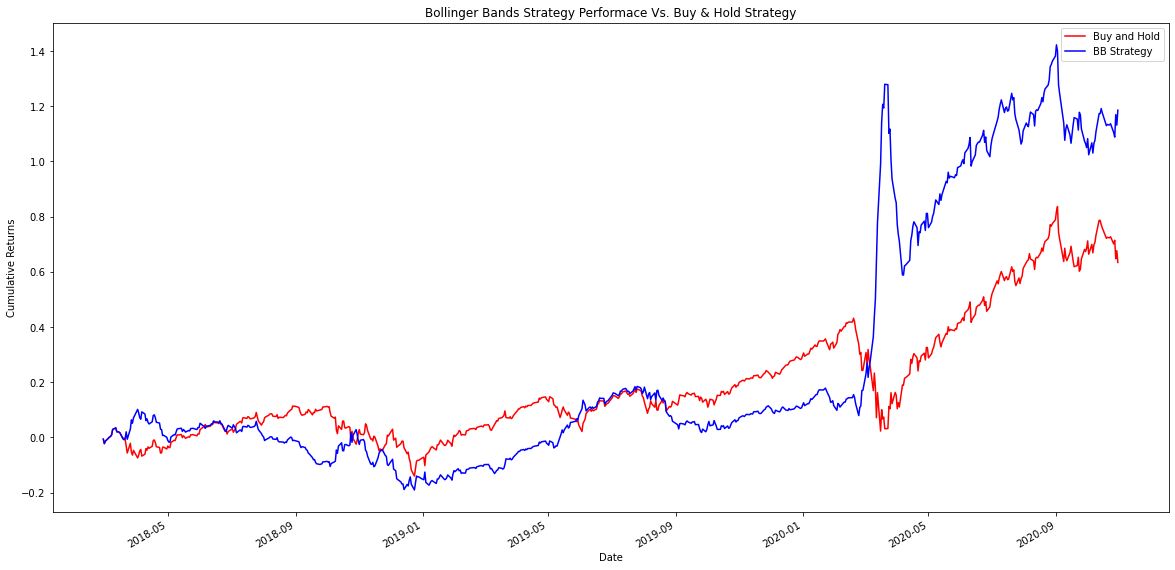

In [6]:
qqq['ma_20'] = qqq['Adj Close'].rolling(window=20).mean()
qqq['Std'] = qqq['Adj Close'].rolling(window=20).std()
qqq.dropna(inplace=True)
qqq['return'] = qqq['Adj Close']/qqq['Adj Close'].shift(1) -1



#Upper and Lower bands of Bollinger Bands
qqq['Upper band'] = qqq['ma_20'] + 2*qqq['Std']
qqq['Lower band'] = qqq['ma_20'] - 2*qqq['Std']


qqq['BB Strategy(upper)'] = np.where(qqq['Adj Close']>qqq['Upper band'],-1,0)


qqq['BB Strategy(within the range)'] = np.where((qqq['Adj Close']<qqq['Upper band']) & 
                                                (qqq['Adj Close']>qqq['ma_20']),1,0)


qqq['BB Strategy(within the range2)'] = np.where((qqq['Adj Close']<qqq['ma_20']) & 
                                                 (qqq['Adj Close']>qqq['Lower band']),-1,0)


qqq['BB Strategy(lower)'] = np.where(qqq['Adj Close']<qqq['Lower band'],1,0)

qqq['BB Strategy(total)'] = (qqq['BB Strategy(upper)'] + 
                            qqq['BB Strategy(lower)'] + 
                            qqq['BB Strategy(within the range)'] + 
                            qqq['BB Strategy(within the range2)'])
            
            
qqq['BB Strategy Return'] = qqq['BB Strategy(total)'].shift(1)*qqq['return']
qqq['BB Strategy Cummulative Return'] = qqq['BB Strategy Return'].add(1).cumprod().sub(1)


qqq['Cum return'] = qqq['return'].add(1).cumprod().sub(1)

plt.figure(figsize=(20,10))
qqq['Cum return'].plot(color='red')
qqq['BB Strategy Cummulative Return'].plot(color='blue')
plt.legend(['Buy and Hold','BB Strategy'])
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Bollinger Bands Strategy Performace Vs. Buy & Hold Strategy");
plt.show()





In [9]:
#Compare Total Return of the period
print("Buy and Hold Strategy's Total Return: " + str(qqq['Cum return'][-1]))
print("BB Strategy's Total Return: "+ str(qqq['BB Strategy Cummulative Return'][-1]))

Buy and Hold Strategy's Total Return: 0.6298505445394593
BB Strategy's Total Return: 1.3355494685743277


In [10]:
#Compare Risk of the period
print("Buy and Hold Strategy's Standard Deviation: " + str(qqq['return'].std()))
print("BB Strategy's Standard Deviation: "+ str(qqq['BB Strategy Return'].std()))

Buy and Hold Strategy's Standard Deviation: 0.01692472879103214
BB Strategy's Standard Deviation: 0.01689092224058644


In [5]:
qqq.head()

,High,Low,Open,Close,Volume,Adj Close,ma_20,Std,return,Upper band,Lower band,BB Strategy(upper),BB Strategy(within the range),BB Strategy(within the range2),BB Strategy(lower),BB Strategy(total),BB Strategy Return,BB Strategy Cummulative Return,Cum return
Date,,,,,,,,,,,,,,,,,,,
2018-01-30,169.419998,167.820007,168.550003,168.699997,44987700.0,164.771820,161.251244,3.566338,NaN,168.383921,154.118568,0,1,0,0,1,NaN,NaN,NaN
2018-01-31,169.990005,168.339996,169.649994,169.399994,42449200.0,165.455521,161.784042,3.340588,0.004149,168.465218,155.102865,0,1,0,0,1,0.004149,0.004149,0.004149
2018-02-01,169.729996,167.419998,168.100006,167.960007,38037900.0,164.049057,162.171310,3.113024,-0.008501,168.397359,155.945262,0,1,0,0,1,-0.008501,-0.004386,-0.004386
2018-02-02,167.699997,164.470001,167.300003,164.610001,68478100.0,160.777039,162.381303,2.846007,-0.019945,168.073317,156.689288,0,0,-1,0,-1,-0.019945,-0.024244,-0.024244
2018-02-05,165.750000,158.000000,163.070007,158.119995,105372200.0,154.438156,162.195727,3.231372,-0.039427,168.658470,155.732983,0,0,0,1,1,0.039427,0.014226,-0.062715
